In [16]:
# Observed Trend 1:
# Ride sharing is more common in urban cities compared to suburban and rural.

# Observed Trend 2:
# Mostly drivers are from urban cities.

# Observed Trend 3:
# Urban cities have lower average fare.

# Data is showing a bigger chunk of ride sharing is done in urban cities with lower fares and mostly 
# people who live in urban cities are more likely to be ride sharing drivers. Bubble chart is showing few outliers
# with lower number of rides but highest average fare in rural cities. According to data provided, we can see that ride
# sharing is more successful in urban areas because of higher number of drivers offering competitive fare which eventually
# brings average fare down and increase number of riders.


In [3]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import collections
import matplotlib.lines as mlines

In [4]:
# File to Load Data
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv("data/city_data.csv")
ride_data = pd.read_csv("data/ride_data.csv")

In [5]:
# Combine the data into a single dataset
merge_tables = pd.merge(city_data, ride_data, on="city")

# Display the data table for preview
merge_tables.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [6]:
# Perform calculations on individual columns
group_by_city = merge_tables.groupby(['city'])
group_by_city = group_by_city.agg({'fare': ['mean', 'sum'],
                                   'ride_id': ['count'],
                                   'driver_count': ['mean'],
                                   'type': ['min']})
group_by_city.head()

fare         ride_id driver_count      type
                    mean     sum   count         mean       min
city                                                           
Amandaburgh    24.641667  443.55      18           12     Urban
Barajasview    25.332273  557.31      22           26     Urban
Barronchester  36.422500  582.76      16           11  Suburban
Bethanyland    32.956111  593.21      18           22  Suburban
Bradshawfurt   40.064000  400.64      10            7     Rural

In [7]:
# Joining column names and calculated function names in columns
group_by_city.columns = group_by_city.columns.map('_'.join)
group_by_city.head()

,fare_mean,fare_sum,ride_id_count,driver_count_mean,type_min
city,,,,,
Amandaburgh,24.641667,443.55,18,12,Urban
Barajasview,25.332273,557.31,22,26,Urban
Barronchester,36.422500,582.76,16,11,Suburban
Bethanyland,32.956111,593.21,18,22,Suburban
Bradshawfurt,40.064000,400.64,10,7,Rural


In [8]:
# Renaming columns
group_by_city = group_by_city.rename(columns={"fare_mean": "Average Fare($)",
                                              "fare_sum": "Total Fare($)",
                                              "ride_id_count": "Total Number of Rides (Per City)",
                                              "driver_count_mean": "Total Number of Drivers (Per City)",
                                              "type_min": "City Type"})
group_by_city.head()

,Average Fare($),Total Fare($),Total Number of Rides (Per City),Total Number of Drivers (Per City),City Type
city,,,,,
Amandaburgh,24.641667,443.55,18,12,Urban
Barajasview,25.332273,557.31,22,26,Urban
Barronchester,36.422500,582.76,16,11,Suburban
Bethanyland,32.956111,593.21,18,22,Suburban
Bradshawfurt,40.064000,400.64,10,7,Rural


## Bubble Plot of Ride Sharing Data

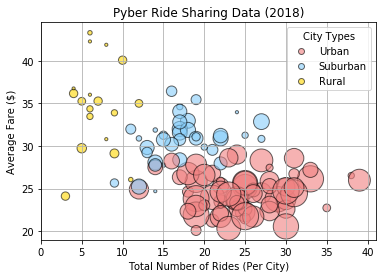

In [9]:
# Grouping city types by colors
def get_city_color(city_type):
    if city_type == 'Urban':
        return 'LightCoral'
    elif city_type == 'Suburban':
        return 'LightSkyBlue'
    else:
        return 'Gold'

# Obtain the x and y coordinates for each of the three city types
x = group_by_city['Total Number of Rides (Per City)']
y = group_by_city['Average Fare($)']
z = group_by_city['Total Number of Drivers (Per City)']

city_type_list = group_by_city['City Type']
city_color_list = [get_city_color(city_type) for city_type in city_type_list]

plt.ylim(19,44.5)
plt.xlim(0,41)

# Incorporate the other graph properties
# Incorporate a text label regarding circle size
plt.scatter(x, y, s=z*10 , c=city_color_list, alpha=0.6, marker="o", edgecolors="black")
plt.title("Pyber Ride Sharing Data (2018)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Build the scatter plots for each city types
urban = mlines.Line2D([], [], 
                           color="white", 
                           marker='o',
                           markeredgecolor="black",
                           markerfacecolor="LightCoral",
                           alpha=0.6,
                           label='Urban')

suburban = mlines.Line2D([], [], 
                           color="white", 
                           marker='o',
                           alpha=0.6,
                           markeredgecolor="black",
                           markerfacecolor="LightSkyBlue", 
                           label='Suburban')

rural = mlines.Line2D([], [], 
                           color="white", 
                           marker='o',
                           alpha=0.6,
                           markeredgecolor="black",
                           markerfacecolor="Gold", 
                           label='Rural')

# Create a legend
plt.legend(handles=[urban, suburban, rural], title="City Types")

# Show Grid
plt.grid()

# Show plot
plt.show()

In [10]:
# Save Figure
plt.savefig("../Pyber/bubble_chart.png")
plt.show()

<Figure size 432x288 with 0 Axes>

In [12]:
# Calculating data by city type
groupby_city_type = group_by_city.groupby('City Type')
city_types = groupby_city_type.agg({'Total Number of Rides (Per City)': ['sum'], 
                                    'Total Fare($)':['sum'], 
                                    'Total Number of Drivers (Per City)':'sum'})

# Renaming columns
city_types.columns = city_types.columns.map('_'.join)
city_types = city_types.rename(columns={"Total Number of Rides (Per City)_sum":"Number of Rides (Per City Type)", 
                                  "Total Fare($)_sum":"Total Fare ($)",
                                  "Total Number of Drivers (Per City)_sum":"Total Number of Drivers (Per City Type)"})

# Showing in df for preview
city_types

,Number of Rides (Per City Type),Total Fare ($),Total Number of Drivers (Per City Type)
City Type,,,
Rural,125,4327.93,78
Suburban,625,19356.33,490
Urban,1625,39854.38,2405


## Total Fares by City Type

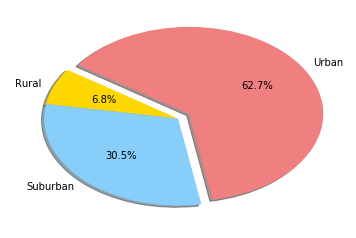

In [13]:
# Labels for the sections of pie chart
labels = ["Urban", "Rural", "Suburban"]

# The values of each section of the pie chart
sizes = [39854.38, 4327.93, 19356.33]

# The colors of each section of the pie chart
colors = ["lightcoral", "gold", "lightskyblue"]

# Tells matplotlib to seperate smaller chunk from bigger section
explode = (0.1, 0, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=280)

# Save Figure
plt.savefig("../Pyber/total_fare_per_city_type_pie.png")
# Show Figure
plt.show()

## Total Rides by City Type

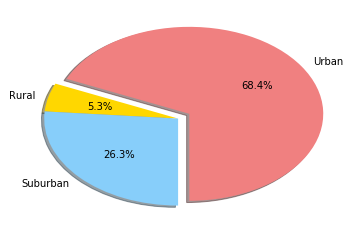

In [14]:
# Labels for the sections of pie chart
labels = ["Urban", "Rural", "Suburban"]

# The values of each section of the pie chart
sizes = [1625, 125, 625]

# The colors of each section of the pie chart
colors = ["lightcoral", "gold", "lightskyblue"]

# Tells matplotlib to seperate smaller chunk from bigger section
explode = (0.1, 0, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=270)

# Save Figure
plt.savefig("../Pyber/Total_number_of_rides_pie.png")
# Show Figure
plt.show()

## Total Drivers by City Type

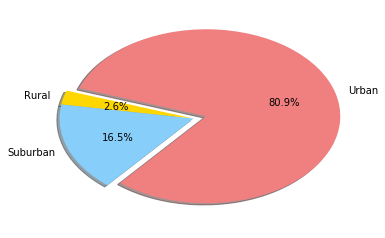

In [15]:
# Labels for the sections of pie chart
labels = ["Urban", "Rural", "Suburban"]

# The values of each section of the pie chart
sizes = [2405, 78, 490]

# The colors of each section of the pie chart
colors = ["lightcoral", "gold", "lightskyblue"]

# Tells matplotlib to seperate smaller chunk from bigger section
explode = (0.1, 0, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=230)

# Save Figure
plt.savefig("../Pyber/total_drivers_per_city_type_pie.png")
# Show Figure
plt.show()